<a href="https://colab.research.google.com/github/SafaaFathii/Dry-Beans-Classification/blob/main/notebooks/DryBeansKaggle2_SafaaFathii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import QuantileTransformer
import catboost as cb
from IPython.core.pylabtools import figsize
from imblearn.under_sampling import NearMiss
import plotly.express as px
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier

import lightgbm as lgb
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import metrics

from sklearn import preprocessing, svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings("ignore")
import time

In [ ]:
df_Train = pd.read_csv("train.csv",index_col="ID")
#df_Train.head(5)
df_Test = pd.read_csv("test.csv",index_col="ID")
df_Test.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [ ]:
df_Train.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [ ]:
df_Train.isnull().sum().max()

0

In [ ]:
df_Test.isnull().sum().max()

0

In [ ]:
df_Train.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

Text(0.5, 1.0, 'Trget data distribution')

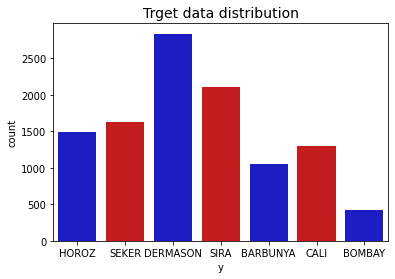

In [ ]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('y', data=df_Train, palette=colors)
plt.title('Trget data distribution', fontsize=14)

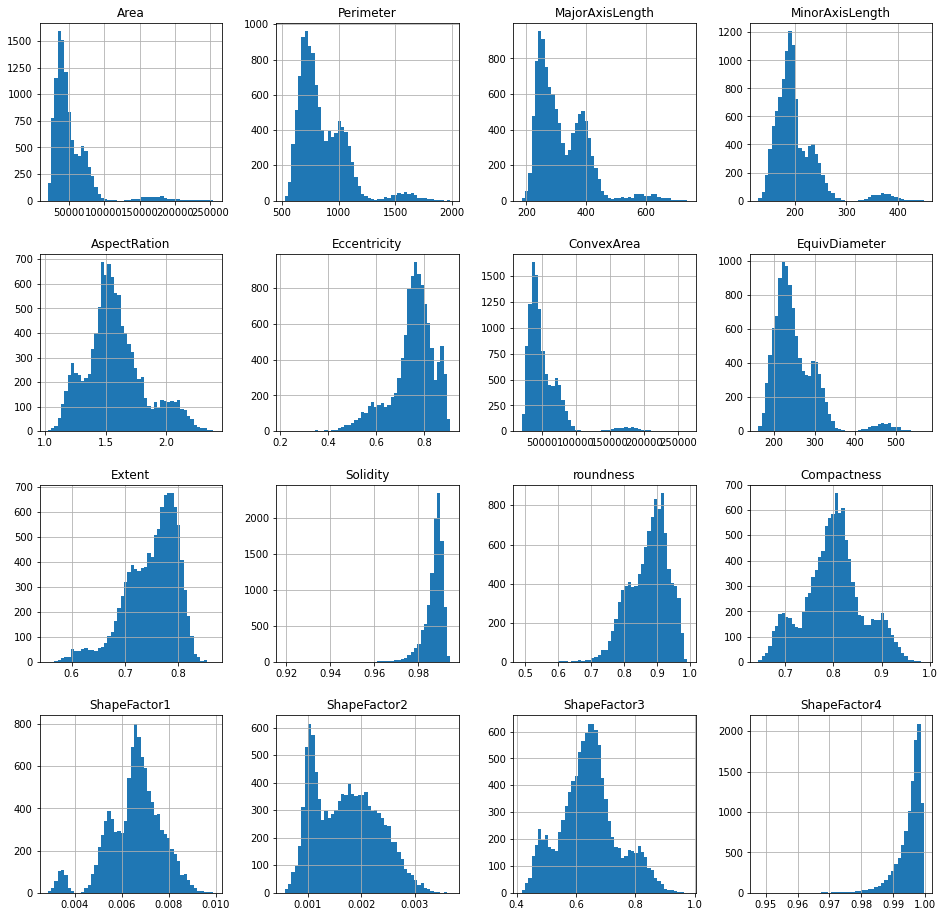

In [ ]:
%matplotlib inline
df_Train.drop(["y"],axis=1).hist(bins=50, figsize=(16,16))
plt.show()

In [ ]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()


In [ ]:
for col in df_Train.drop(["y"],axis=1):
    df_Train[col] = rob_scaler.fit_transform(df_Train[col].values.reshape(-1,1)) 
    df_Test[col] = rob_scaler.fit_transform(df_Test[col].values.reshape(-1,1)) 


In [ ]:
X = df_Train.drop(["y"],axis=1)
y = df_Train["y"]
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 1884  1889  1981 ... 10831 10832 10833] Test: [   0    1    2 ... 2334 2342 2344]
Train: [    0     1     2 ... 10831 10832 10833] Test: [1884 1889 1981 ... 4541 4544 4571]
Train: [    0     1     2 ... 10831 10832 10833] Test: [3983 4047 4048 ... 6647 6655 6661]
Train: [    0     1     2 ... 10831 10832 10833] Test: [6073 6129 6270 ... 8867 8872 8882]
Train: [   0    1    2 ... 8867 8872 8882] Test: [ 8540  8545  8553 ... 10831 10832 10833]


In [ ]:
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [ ]:
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

In [ ]:
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

[0.09760037 0.0386479  0.12032764 0.26176742 0.13740194 0.14963083
 0.1946239 ]
[0.09741459 0.03831948 0.12049861 0.26223453 0.13711911 0.14958449
 0.19482918]


In [ ]:
df_Train = df_Train.sample(frac=1)

In [ ]:
df_Train.shape

(10834, 17)

In [ ]:
df_Train["y"].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

In [ ]:
DERMASON_df = df_Train.loc[df_Train['y'] == "DERMASON"][:420]
SIRA_df = df_Train.loc[df_Train['y'] == "SIRA"][:420]
SEKER_df = df_Train.loc[df_Train['y'] == "SEKER"][:420]
HOROZ_df = df_Train.loc[df_Train['y'] == "HOROZ"][:420]
CALI_df = df_Train.loc[df_Train['y'] == "CALI"][:420]
BARBUNYA_df = df_Train.loc[df_Train['y'] == "BARBUNYA"][:420]
BOMBAY_df = df_Train.loc[df_Train['y'] == "BOMBAY"][:420]
normal_distributed_df = pd.concat([DERMASON_df, SIRA_df,SEKER_df,HOROZ_df,CALI_df,BARBUNYA_df,BOMBAY_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)
#new_df.head()

Distribution of the Classes in the subsample dataset
SIRA        0.142954
CALI        0.142954
DERMASON    0.142954
HOROZ       0.142954
BARBUNYA    0.142954
SEKER       0.142954
BOMBAY      0.142274
Name: y, dtype: float64


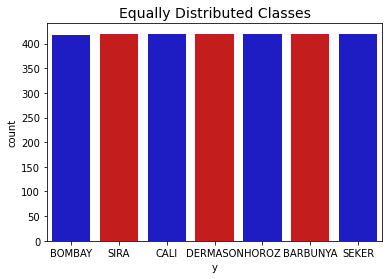

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['y'].value_counts()/len(new_df))
sns.countplot('y', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

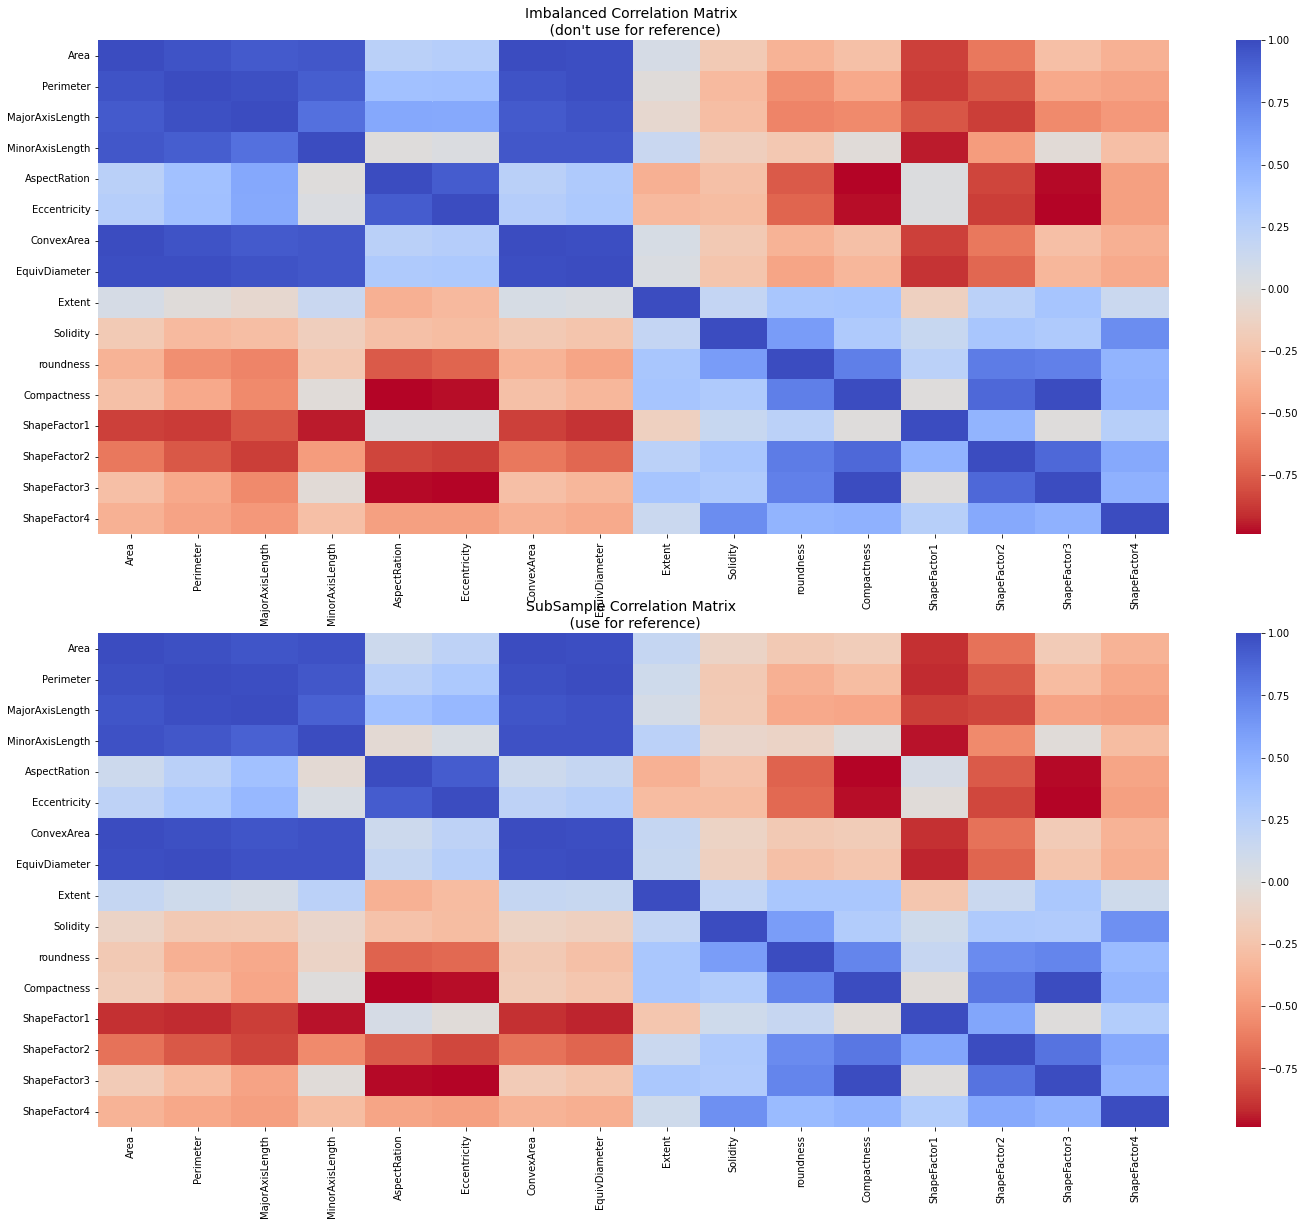

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
corr = df_Train.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [ ]:
new_df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

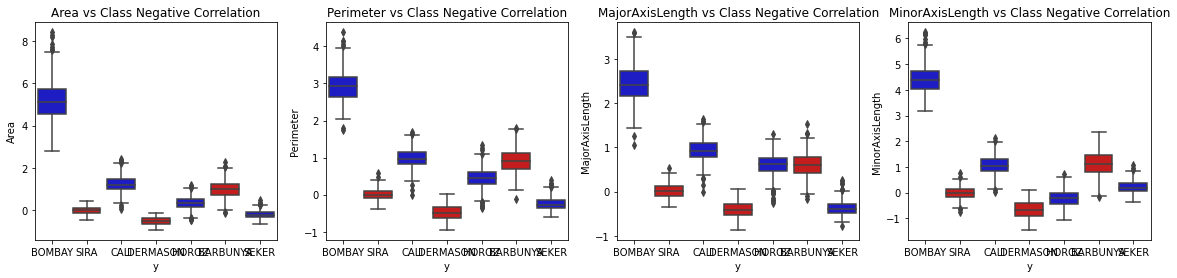

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="y", y="Area", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('Area vs Class Negative Correlation')
sns.boxplot(x="y", y="Perimeter", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('Perimeter vs Class Negative Correlation')
sns.boxplot(x="y", y="MajorAxisLength", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('MajorAxisLength vs Class Negative Correlation')
sns.boxplot(x="y", y="MinorAxisLength", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('MinorAxisLength vs Class Negative Correlation')
plt.show()


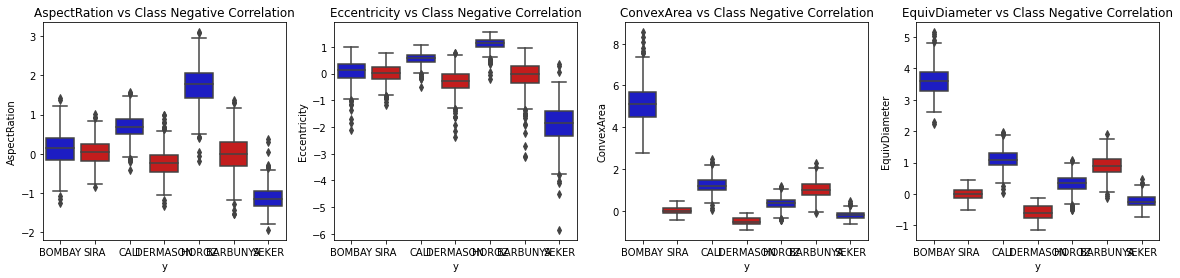

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="y", y="AspectRation", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('AspectRation vs Class Negative Correlation')
sns.boxplot(x="y", y="Eccentricity", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('Eccentricity vs Class Negative Correlation')
sns.boxplot(x="y", y="ConvexArea", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('ConvexArea vs Class Negative Correlation')
sns.boxplot(x="y", y="EquivDiameter", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('EquivDiameter vs Class Negative Correlation')
plt.show()


In [ ]:
new_df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

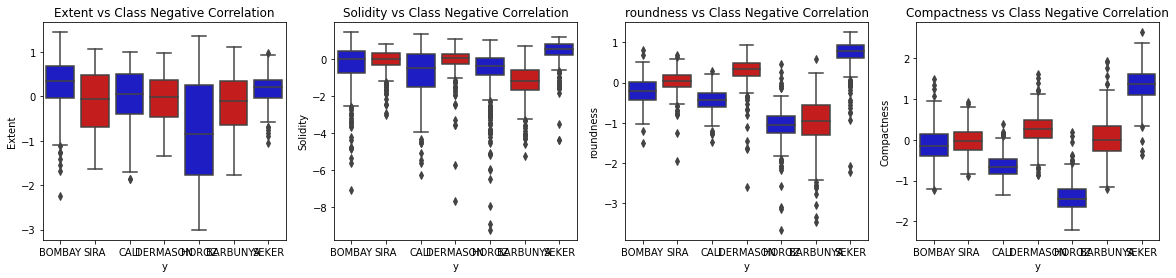

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="y", y="Extent", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('Extent vs Class Negative Correlation')
sns.boxplot(x="y", y="Solidity", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('Solidity vs Class Negative Correlation')
sns.boxplot(x="y", y="roundness", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('roundness vs Class Negative Correlation')
sns.boxplot(x="y", y="Compactness", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('Compactness vs Class Negative Correlation')
plt.show()

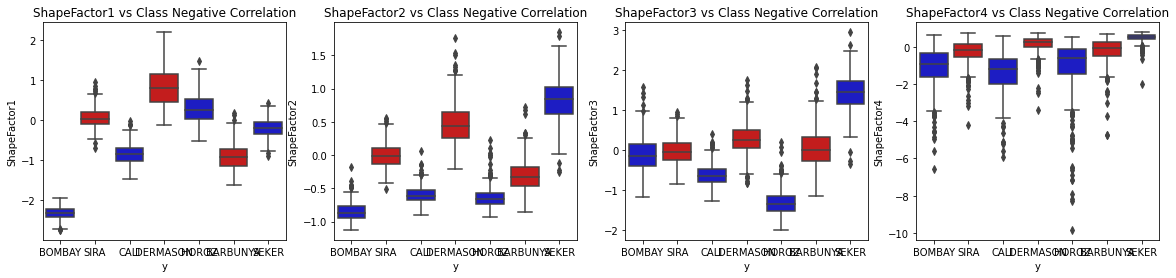

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="y", y="ShapeFactor1", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('ShapeFactor1 vs Class Negative Correlation')
sns.boxplot(x="y", y="ShapeFactor2", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('ShapeFactor2 vs Class Negative Correlation')
sns.boxplot(x="y", y="ShapeFactor3", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('ShapeFactor3 vs Class Negative Correlation')
sns.boxplot(x="y", y="ShapeFactor4", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('ShapeFactor4 vs Class Negative Correlation')
plt.show()

In [ ]:
new_df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

In [ ]:
df_Train["y"].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

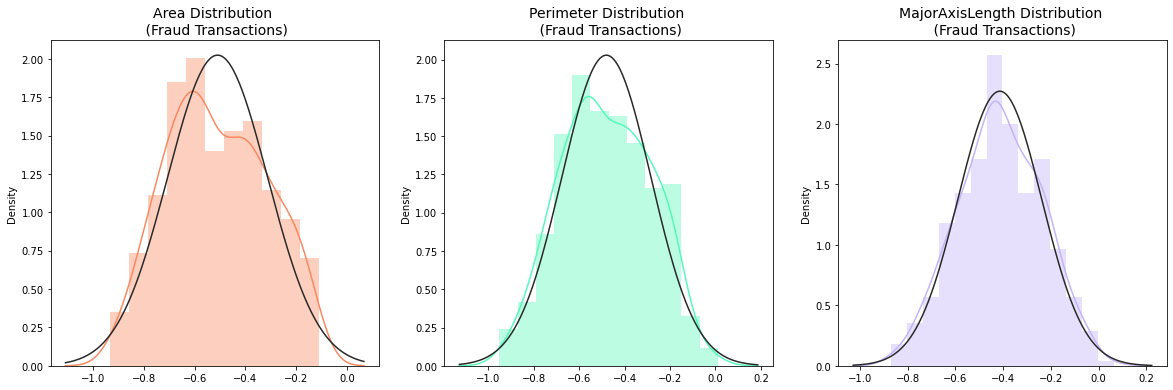

In [ ]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['Area'].loc[new_df['y'] == "DERMASON"].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Area Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['Perimeter'].loc[new_df['y'] == "DERMASON"].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Perimeter Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['MajorAxisLength'].loc[new_df['y'] == "DERMASON"].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('MajorAxisLength Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [ ]:
Area_DERMASON = new_df['Area'].loc[new_df['y'] == "DERMASON"].values
q25, q75 = np.percentile(Area_DERMASON, 25), np.percentile(Area_DERMASON, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
Area_DERMASON_iqr = q75 - q25
print('iqr: {}'.format(Area_DERMASON_iqr))

Quartile 25: -0.6599903813397993 | Quartile 75: -0.35687233232470994
iqr: 0.3031180490150893


In [ ]:
Area_DERMASON_cut_off = Area_DERMASON_iqr * 1.5
Area_DERMASON_lower, Area_DERMASON_upper = q25 - Area_DERMASON_cut_off, q75 + Area_DERMASON_cut_off
print('Cut Off: {}'.format(Area_DERMASON_cut_off))
print('Area Lower: {}'.format(Area_DERMASON_lower))
print('Area Upper: {}'.format(Area_DERMASON_upper))

outliers = [x for x in Area_DERMASON if x < Area_DERMASON_lower or x > Area_DERMASON_upper]
print('Feature Area Outliers for Fraud Cases: {}'.format(len(outliers)))
print('Area outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['Area'] > Area_DERMASON_upper) | (new_df['Area'] < Area_DERMASON_lower)].index)
print('----' * 44)

Cut Off: 0.454677073522634
Area Lower: -1.1146674548624333
Area Upper: 0.09780474119792404
Feature Area Outliers for Fraud Cases: 0
Area outliers:[]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
def removeOutliers(new_df):
    for col in new_df.drop(["y"],axis=1):
        for value in list(new_df["y"].unique()):
            Area_DERMASON = new_df[col].loc[new_df['y'] == value].values
            q25, q75 = np.percentile(Area_DERMASON, 25), np.percentile(Area_DERMASON, 75)
            print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
            Area_DERMASON_iqr = q75 - q25
            print('iqr: {}'.format(Area_DERMASON_iqr))
            Area_DERMASON_cut_off = Area_DERMASON_iqr * 1.5
            Area_DERMASON_lower, Area_DERMASON_upper = q25 - Area_DERMASON_cut_off, q75 + Area_DERMASON_cut_off
            print('Cut Off: {}'.format(Area_DERMASON_cut_off))
            print('Area Lower: {}'.format(Area_DERMASON_lower))
            print('Area Upper: {}'.format(Area_DERMASON_upper))
            outliers = [x for x in Area_DERMASON if x < Area_DERMASON_lower or x > Area_DERMASON_upper]
            print('Feature Area Outliers for Fraud Cases: {}'.format(len(outliers)))
            print('Area outliers:{}'.format(outliers))
            new_df = new_df.drop(new_df[(new_df[col] > Area_DERMASON_upper) | (new_df[col] < Area_DERMASON_lower)].index)
            print('----' * 44)
removeOutliers(new_df)


Quartile 25: -0.162936096026291 | Quartile 75: 0.004568863595375027
iqr: 0.16750495962166603
Cut Off: 0.25125743943249906
Area Lower: -0.41419353545879006
Area Upper: 0.25582630302787407
Feature Area Outliers for Fraud Cases: 3
Area outliers:[-0.44818948760595556, -0.43708795062421096, -0.4424583692363185]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -0.3568322545738733 | Quartile 75: -0.207833196401018
iqr: 0.1489990581728553
Cut Off: 0.22349858725928295
Area Lower: -0.5803308418331563
Area Upper: 0.01566539085826496
Feature Area Outliers for Fraud Cases: 0
Area outliers:[]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -0.3207823176963309 | Quartile 75: -0.13461114562250767
iqr: 0.18617117207382325
Cu

IndexError: ignored

In [ ]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('y', axis=1)
y = new_df['y']
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

In [ ]:
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

In [ ]:
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

In [ ]:
labelencoder = LabelEncoder()
new_df['y'] = labelencoder.fit_transform(new_df['y'])

In [ ]:
labelencoder = LabelEncoder()
df_Train['y'] = labelencoder.fit_transform(df_Train['y'])

In [ ]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('y', axis=1)
y = new_df['y']

In [ ]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

In [ ]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []
log_reg_sm = xgb.XGBClassifier(random_state=42,verbosity=0, min_child_weight=5,n_estimators=200,penalty='l1', solver='liblinear',
                             max_depth=6, learning_rate=0.12, gamma=0.3, colsample_bytree=0.9)
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction,average="micro"))
    recall_lst.append(recall_score(original_ytrain[test], prediction,average="micro"))
    f1_lst.append(f1_score(original_ytrain[test], prediction,average="micro"))
    #auc_lst.append(roc_auc_score(original_ytrain[test], prediction,average="micro"))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

In [ ]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
yPred = lr.predict(df_Test)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

In [ ]:
clf= xgb.XGBClassifier(random_state=42,verbosity=0, min_child_weight=5,n_estimators=200,
                             max_depth=6, learning_rate=0.12, gamma=0.3, colsample_bytree=0.9)

clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))